<a href="https://colab.research.google.com/github/KritiShahi/Udacity-Intro-To-Deep-Learning-with-Pytorch/blob/master/binary%20classification/Building_classifier_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building Classifier
--- You are a data scientist at vacation rental company. So far company was doing good differentiating itself as a company renting single family vacation homes only. Vocation season is about to start, customers renting, and homeowners are listing. Quality control team is overwhelmed. Team is asking is there way to make their life easier. Ypu just accepted the challenge of classifying listing automatically. As a proof of concept you start with 2 big classes residential, industrial. 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import os 
os.chdir('drive/My Drive')

In [0]:
%ls

In [0]:
%cd 'Udacity Scholarship Phase 1 Documents'

In [0]:
!unzip staticmap

## Importing Libraries

In [8]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


## Creating DataLoaders

In [0]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler



# TODO - convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# choose the training and test datasets
total_data =  datasets.ImageFolder('staticmap', transform=transform)

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# choose the training and test datasets
train_data =  datasets.ImageFolder('staticmap/train', transform=transform)
test_data =  datasets.ImageFolder('staticmap/test', transform=transform)


# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)





## Define Classes

In [0]:
# TODO - specify the image classes
classes = ["industrial" , "residential"]

## Visualize Batch of Training Data

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

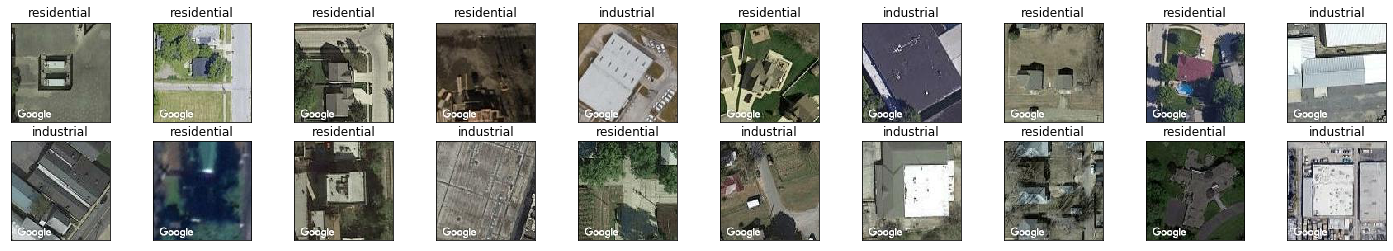

In [14]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [15]:
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

# Using GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Using a pretrained model
model = models.densenet121(pretrained=True)

#Printing the model
print(model)





Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth



DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

### Freeze parameters

In [0]:
# TODO - Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

### Define model

In [0]:
# TODO - Defining the model
from collections import OrderedDict
model.classifier = nn.Sequential(OrderedDict([
                                ('fc1', nn.Linear(1024, 512)),
                                ('relu', nn.ReLU()),
                                ('fc2', nn.Linear(512, 2)),
                                ('output', nn.LogSoftmax(dim=1))                                          
                   ]))

### Define criterion and optimizer 

In [18]:
# TODO - Defining the criterion
criterion = nn.NLLLoss()

# TODO - Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr = 0.003)

# Moving the model to GPU if it's available
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

### Calculating the Training Loss, Testing Loss and Test Accuracy

In [24]:
import pandas as pd
# TODO - Define the number of epochs
epochs = 20
steps = 0
running_loss = 0
print_every = 5
training_losses = [] 
testing_losses = []
train_stats = pd.DataFrame(columns = ['Epoch',  'Train loss',
                                      'Test loss'])
for epoch in range(epochs):
    for inputs, labels in train_loader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
                    running_loss = 0
                    model.train()
    print(f"Epoch {epoch+1}/{epochs}.. "
          f"Train loss: {running_loss/print_every:.3f}.. "
          f"Test loss: {test_loss/len(test_loader):.3f}.. "
          f"Test accuracy: {accuracy/len(test_loader):.3f}")
    train_stats = train_stats.append({'Epoch': epoch, 
                                      'Train loss' : training_losses.append(running_loss/len(train_loader)),
                                     'Test loss' : testing_losses.append(test_loss/len(test_loader))}, ignore_index=True)
            

Epoch 1/20.. Train loss: 0.001.. Test loss: 1.530.. Test accuracy: 0.583
Epoch 2/20.. Train loss: 0.026.. Test loss: 1.922.. Test accuracy: 0.553
Epoch 3/20.. Train loss: 0.034.. Test loss: 1.475.. Test accuracy: 0.603
Epoch 4/20.. Train loss: 0.085.. Test loss: 1.829.. Test accuracy: 0.603
Epoch 5/20.. Train loss: 0.000.. Test loss: 1.864.. Test accuracy: 0.583
Epoch 6/20.. Train loss: 0.091.. Test loss: 1.908.. Test accuracy: 0.590
Epoch 7/20.. Train loss: 0.095.. Test loss: 1.722.. Test accuracy: 0.590
Epoch 8/20.. Train loss: 0.096.. Test loss: 1.669.. Test accuracy: 0.570
Epoch 9/20.. Train loss: 0.164.. Test loss: 1.643.. Test accuracy: 0.607
Epoch 10/20.. Train loss: 0.000.. Test loss: 1.496.. Test accuracy: 0.593
Epoch 11/20.. Train loss: 0.004.. Test loss: 1.736.. Test accuracy: 0.563
Epoch 12/20.. Train loss: 0.032.. Test loss: 1.631.. Test accuracy: 0.597
Epoch 13/20.. Train loss: 0.087.. Test loss: 1.736.. Test accuracy: 0.627
Epoch 14/20.. Train loss: 0.066.. Test loss: 1.

### Visualizing Training and Testing Loss

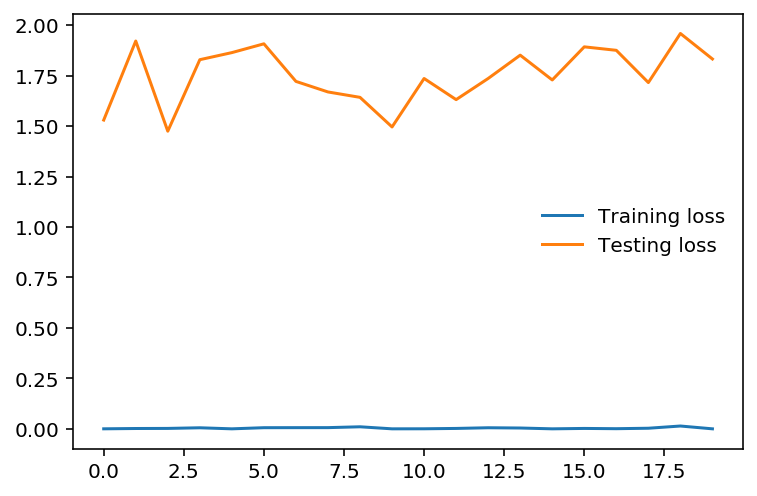

In [26]:
# TODO - Visualizing Training and Testing Loss
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.plot(training_losses, label='Training loss')
plt.plot(testing_losses, label='Testing loss')
plt.legend(frameon=False)

### Visualizing Test Loss

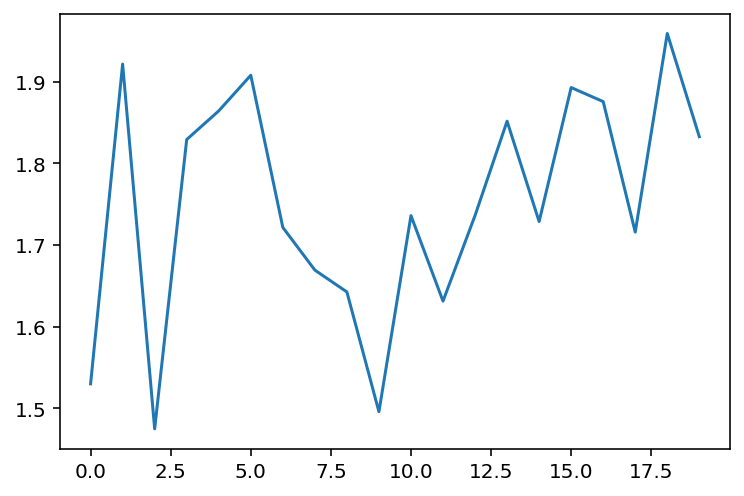

In [27]:
#TODO - Visualizing Test Loss
plt.plot(testing_losses, label='Testing loss')

### Calculating overall test loss and test accuracy of output classes

In [28]:
# TODO - Calculating test loss and test accuracy of output classes
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

# prep model for evaluation
model.eval() 

for data, target in test_loader:
    data, target = data.to(device),target.to(device)
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))


Test Loss: 0.586659

Test Accuracy of     0: 96% (145/150)
Test Accuracy of     1: 79% (119/150)

Test Accuracy (Overall): 88% (264/300)


### Testing the model

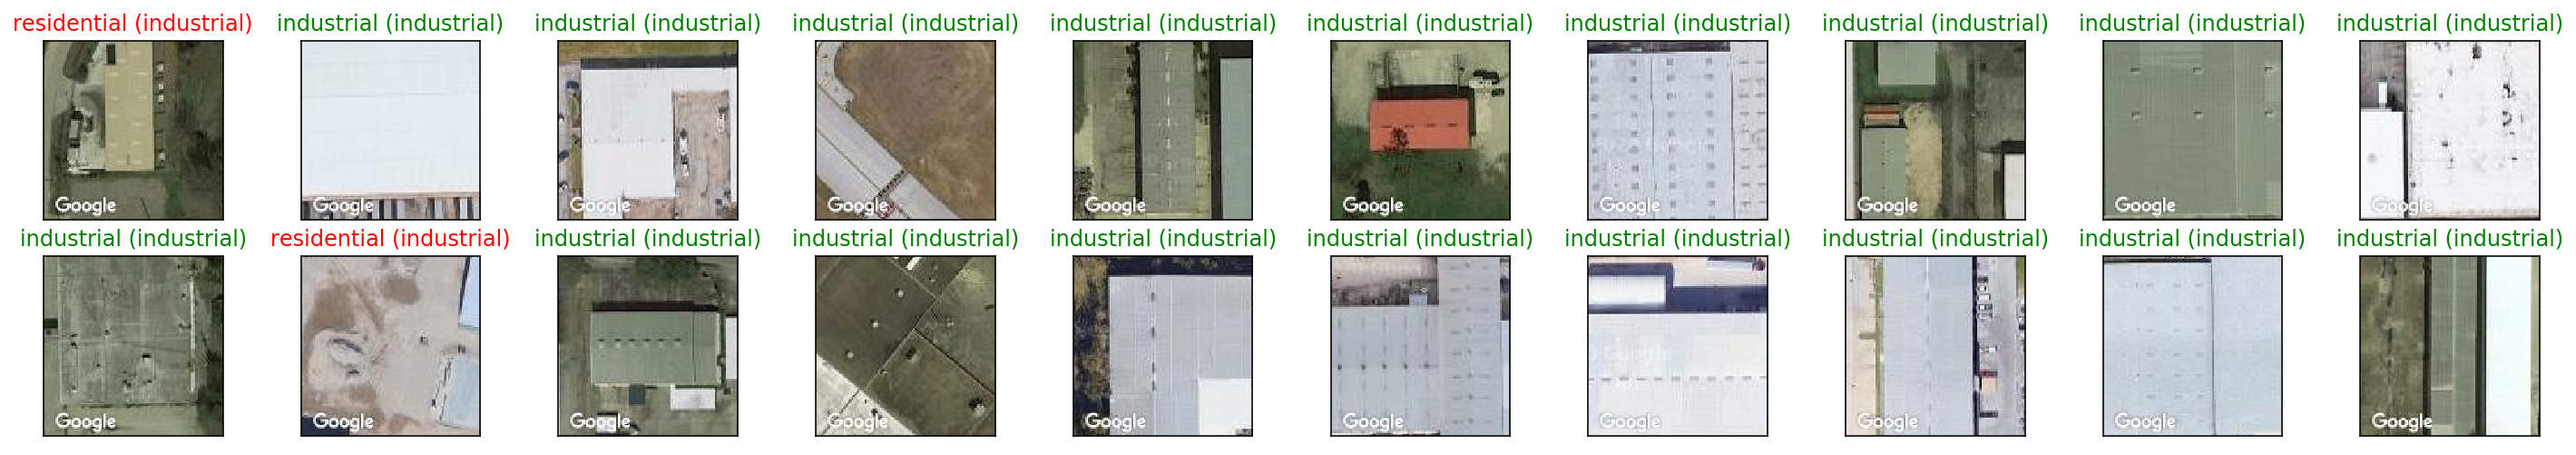

In [29]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))